Q1.（1）：
Simple linear regression theoretical modeling is a statistical method used to describe the linear relationship between two variables. It consists of a dependent variable and an independent variable.
Predictor variable (X): this is a known variable in the model that is used to predict the value of the outcome variable. For example, if we want to study the effect of study time on test scores, study time is the predictor variable.

Outcome variable (Y): also known as the dependent variable, this is the variable we wish to predict or explain. In the above example, test scores would be the outcome variable.

Intercept
: This is the constant term on the Y-axis that indicates the value of the outcome variable Y when X is zero.

Slope (𝛽 ): this is the coefficient of the predictor variable and indicates the extent to which the mean value of Y is going to change for each unit increase in X.

Error term (ε): this is the random error in the model and is used to represent those parts of Y that cannot be explained by X. It is the difference between the value of y at the point on the model and the actual data point.

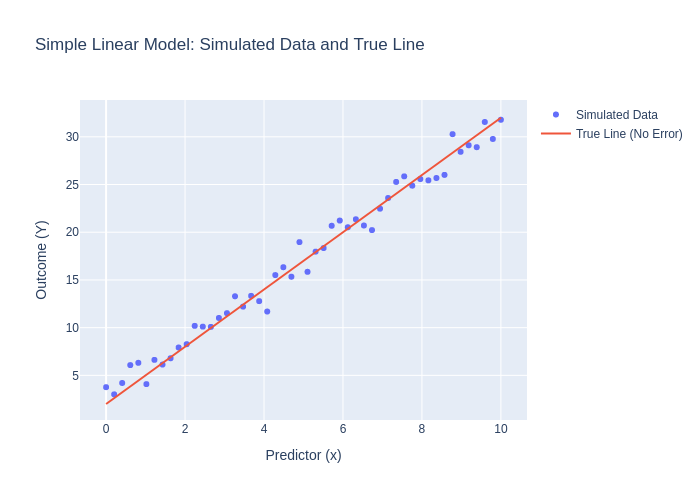

In [3]:
#Q1.（2）：
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

n = 50                
beta0 = 2             
beta1 = 3             
sigma = 1             

x = np.linspace(0, 10, n)
np.random.seed(0)  
errors = norm.rvs(loc=0, scale=sigma, size=n)
Y = beta0 + beta1 * x + errors

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data'))
fig.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='True Line (No Error)'))
fig.update_layout(title='Simple Linear Model: Simulated Data and True Line',
                  xaxis_title='Predictor (x)',
                  yaxis_title='Outcome (Y)')
fig.show(renderer="png")


# link of chat：https://chatgpt.com/share/672bc7bf-79fc-8005-8b9a-69550232a1f2

Q1.（3）：summary of chatbot
We discussed the basics of the linear regression model, a technique used to predict a continuous outcome based on one or more input variables. T
For multiple predictors, the model expands to include additional terms for each predictor. We also touched on key assumptions (linearity, independence, homoscedasticity, and normality of errors) and ways to assess the model's fit, such as R-squared and p-values for coefficients. This model helps in understanding and quantifying relationships between variables.

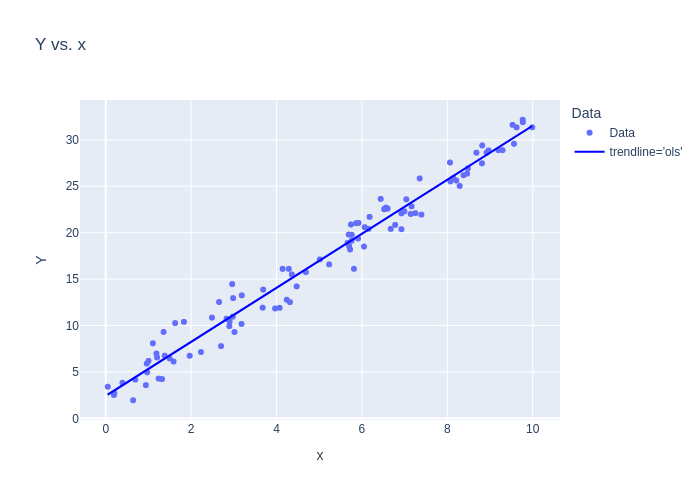

In [4]:
# Q2.：
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import norm, uniform
import statsmodels.formula.api as smf  
import plotly.express as px

n = 100
beta0 = 2  
beta1 = 3  
sigma = 1.5  

x = uniform.rvs(0, 10, size=n)
errors = norm.rvs(0, sigma, size=n)
y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'Y': y})

model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit()
fitted_model.summary()  # simple explanation? 
fitted_model.summary().tables[1]  # simple explanation?
fitted_model.params  # simple explanation?
fitted_model.params.values  # simple explanation?
fitted_model.rsquared  # simple explanation?

# what two things does this add onto the figure?
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

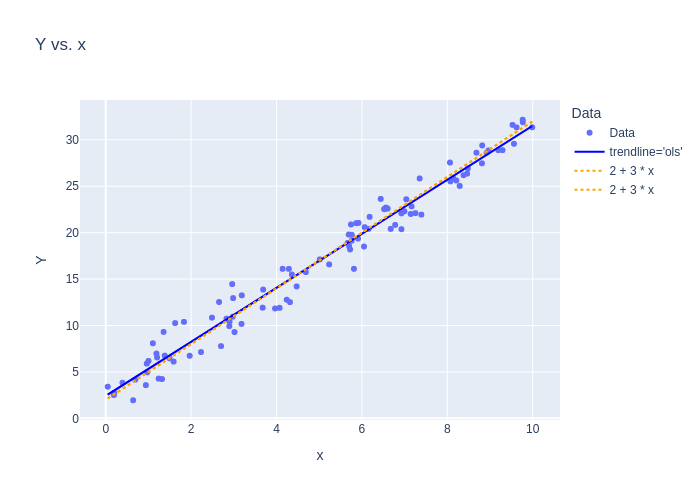

In [5]:
#Q3：（1）
# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png") 

Q3.（2）：
The first row reflects the real relationship between x and y because it uses real data, while the second row reflects the simulated relationship between x and y because it uses least squares simulated data.


link：https://chatgpt.com/share/672bcd39-ed70-8005-9862-db858d134070
summary of chatbot：In our conversation, you provided Python code to simulate and visualize data for a simple linear regression model. The first code snippet generated a "true" line for the linear relationship \( Y = 2 + 3 \cdot x \), without any noise, and plotted it alongside simulated data points with random errors. 

In the second code, you applied an Ordinary Least Squares (OLS) regression to fit a line based on the noisy data. This produced an estimated line, potentially differing from the "true" line due to the added randomness.

We then discussed the key differences between these lines:
- The "true" line represents the exact relationship without noise, while the fitted line is an estimate derived from the noisy data.

Q4：
With this table, I can get the parameters of the regression equation I want to construct: intercept and slope. Then use these two pieces of data to find a line of regression equations to create a specific math equation. Substituting all of the known x's into the equation will give us the y value we want.

Here's a summary of chat:

You asked about fit_model.summary().tables[1], which typically contains the coefficient estimates for a fitted statistical model (e.g., in statsmodels). This table shows the estimated values of each predictor's coefficient, standard errors, t-values, p-values, and confidence intervals.

Then, you asked how fitted_model.fittedvalues are derived from these coefficients. The fitted values are the predicted values of the dependent variable, calculated using the regression equation: each predictor's coefficient (from summary().tables[1]) is multiplied by its respective value in an observation and summed with the intercept. This calculation is repeated across all observations in the dataset to produce fitted_model.fittedvalues.

link:https://chatgpt.com/share/672bd45b-922c-8005-88e6-b35859b74840

Q5：
When we use the real value of the data minus the simulated value, we get a difference called error. the minimum residual sum of squares is found by summing the squares of the errors and comparing them. After that we derive the best fitted β. We find the best fitted model by β. The main reason for squaring is that squaring amplifies the effect of error so that we can better see the difference between different error values and also eliminates the effect of positive and negative values of the data.

summary of chat：
Ordinary Least Squares (OLS) is a method used in linear regression to estimate the parameters of a model by minimizing the sum of squared differences between observed and predicted values. The "squares" are used to emphasize larger errors, prevent cancellation of positive and negative residuals, and make the error function smooth and differentiable, allowing for easier optimization. This approach ensures that large deviations are penalized more, leading to a more accurate model. OLS is widely used for its simplicity and efficiency in estimating relationships between variables.

link：https://chatgpt.com/share/672bdb55-8464-8005-af7c-c995824dd539

Q6.（1）：
1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
This string of code represents the formula for R-squared, the numerator of this fraction is the residual sum of squares, which represents the error that cannot be explained by the model, and the denominator is the total sum of squares. The result of this calculation is the proportion of the overall data that can be explained by the model, i.e., the model's explanatory power

Q6.（2）：
fitted_model.rsquared
This code generates R-squared directly from the data, and as I explained in the previous question, R-squared is the value used to measure the model's explanatory power.

(3):
np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
This function u calculates the correlation coefficient between the two variables Y and (^Y), that is, the strength of the linear relationship between them, denoted r. Squaring the result of r again still yields R-squared, which describes the explanatory power of the function.Unlike x and y, this approach finds the correlation between the predicted values of y and y as a way to predict the predictive accuracy of the model.

np.corrcoef(Y,x)[0,1]**2
This code is similar to the last one and finds the correlation coefficient between x and y. This is the usual way to find R-squared

（4）：summary of chatbot
We discussed different methods to evaluate the explanatory power of a regression model. Specifically, we explored R-squared, which indicates how much of the variance in the dependent variable \( Y \) is explained by the model. The formula `fitted_model.rsquared` directly gives R-squared, while the expression `1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum()` also calculates R-squared by comparing the residual sum of squares and the total sum of squares. Additionally, the squared Pearson correlation coefficient, computed with `np.corrcoef(Y, fitted_model.fittedvalues)[0, 1]**2`, provides the same result, showing how well the model’s predicted values explain the variance in \( Y \). In all cases, a higher R-squared value indicates stronger explanatory power, meaning the model does a better job of capturing the variability in the dependent variable.

link：https://chatgpt.com/share/672be1a2-3180-8005-ad26-022f40579753

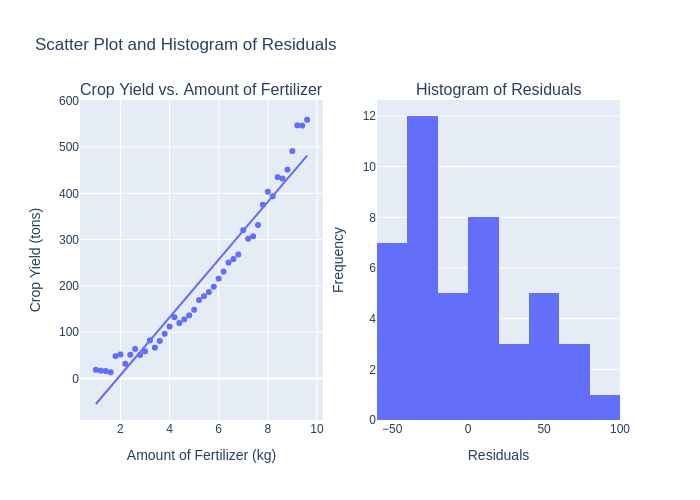

In [1]:
# Q7：（1）
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

Q7.（2）：
According to the second image, the distribution of ERROR values shows a right skew. It shows that it does not follow a normal distribution. And the data values close to one hundred appear less frequently, indicating that values in different ranges have different degrees of dispersion. So I think it violates Normality Assumption and Constant Variance Assumption.

In [6]:
# Q8：（1）
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        21:51:33   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q8.（2）：
null hypothesis：There is no linear relationship between x and y. The slope of the linear regression equation is 0
alternative hypothesis：There is a linear relationship between x and y. The slope of the linear regression equation is not 0
According to the data in the graph we can find that the value of p-value is a number less than 0.001, which indicates that there is VERY strong evidence against the null hypothesis. so we have successfully rejected the null hypothesis that the slope of the regression equation is not 0, and that there is indeed a linear relationship between the x and y values

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


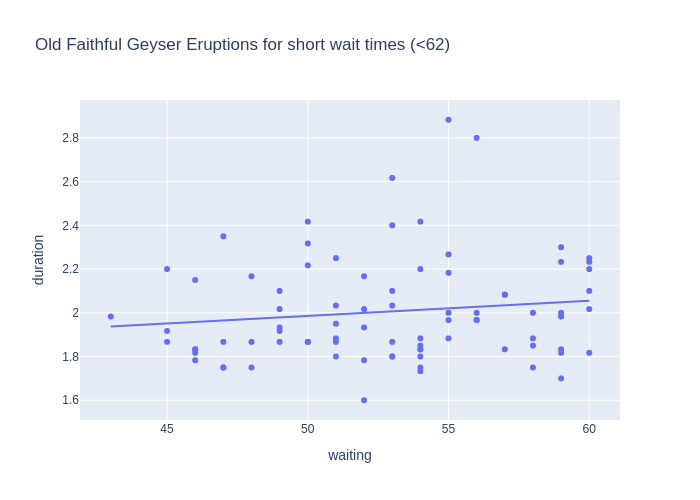

In [7]:
# Q9
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

Q9：
According to the data in question 9, we find that the value of p-value is greater than 0.1, which means No evidence against the null hypothesis. so in question 9 we get the conclusion that fail to reject the null hypothesis, there is no obvious linear relationship between x and y.


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


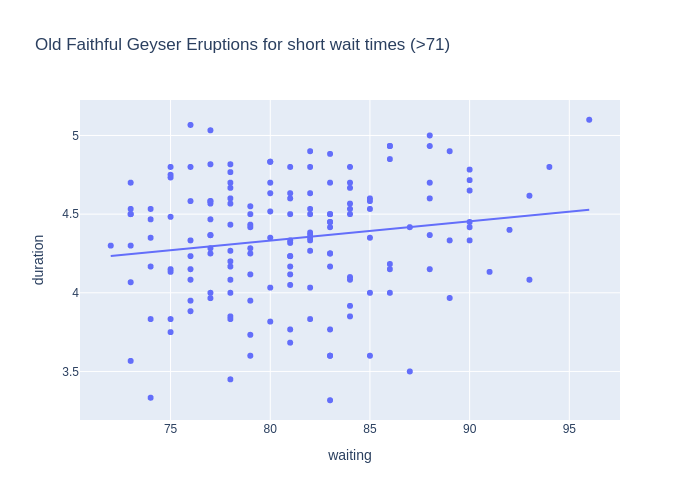

In [11]:
# Q10
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")

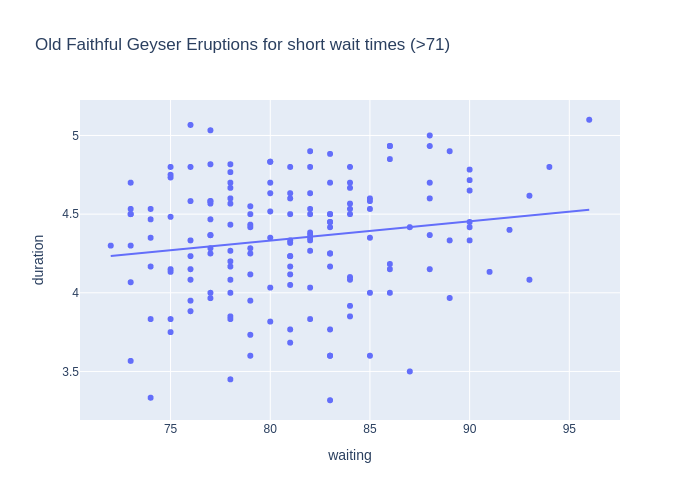

95% Bootstrapped Confidence Interval for Slope: [0.00677783 0.04645334]


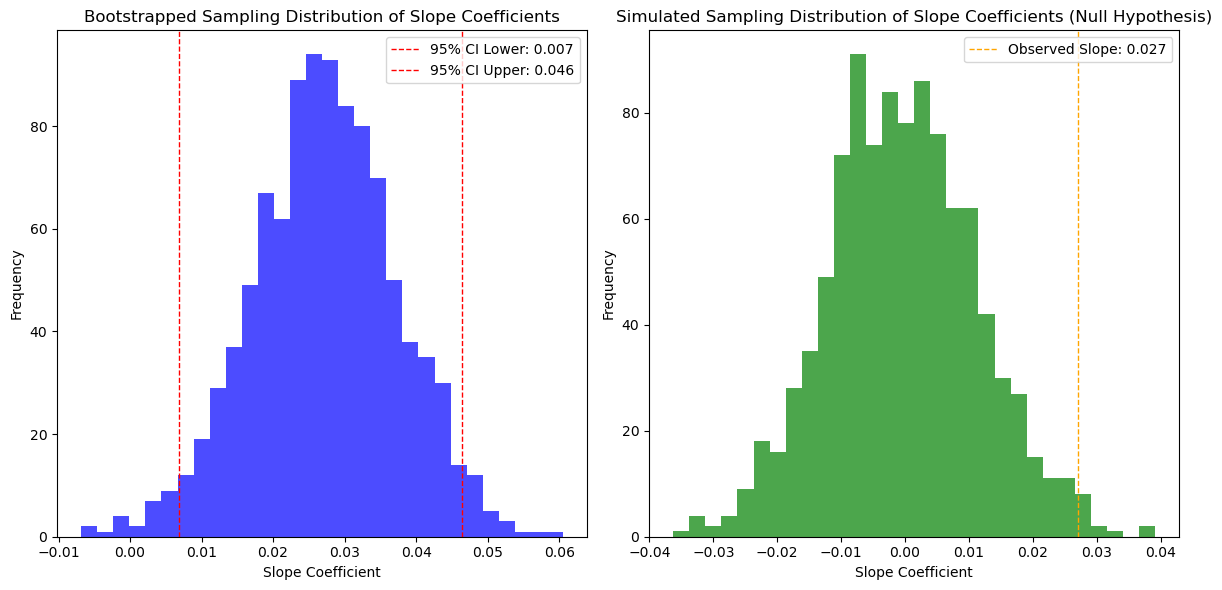

In [12]:
# Q10
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats

long_wait = old_faithful['waiting'] > 80 
n_bootstrap = 1000 
n_simulations = 1000 

bootstrapped_slope_coefficients = []

for _ in range(n_bootstrap):
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params['waiting'])

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

simulated_slope_coefficients = []

for _ in range(n_simulations):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + \
                                          stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params['waiting'])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

conf_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_slope = original_model.params['waiting']
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(bootstrapped_slope_coefficients, bins=30, alpha=0.7, color='blue')
plt.axvline(conf_interval[0], color='red', linestyle='dashed', linewidth=1, label=f'95% CI Lower: {conf_interval[0]:.3f}')
plt.axvline(conf_interval[1], color='red', linestyle='dashed', linewidth=1, label=f'95% CI Upper: {conf_interval[1]:.3f}')
plt.title("Bootstrapped Sampling Distribution of Slope Coefficients")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(simulated_slope_coefficients, bins=30, alpha=0.7, color='green')
plt.axvline(observed_slope, color='orange', linestyle='dashed', linewidth=1, label=f'Observed Slope: {observed_slope:.3f}')
plt.title("Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
fig.show(renderer="png")

print(f"95% Bootstrapped Confidence Interval for Slope: {conf_interval}")


Q10：
Setting the confidence interval to include 0 for the null hypothesis, and the confidence interval to not include 0 for the alternative hypothesis
According to the calculations, since the confidence interval does not contain 0, we have sufficient evidence to REJECT the null hypothesis. This conclusion is the same as the previous results obtained from hypothesis testing with p-value

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


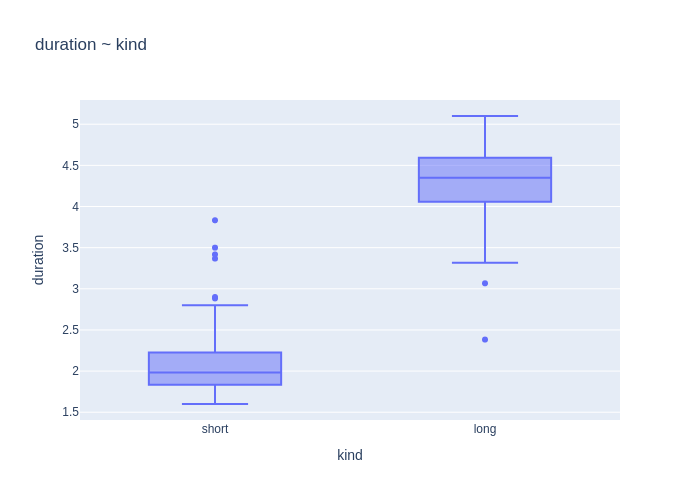

In [14]:
#Q11：
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

Q11：
Unlike the previous approach, question 11 sets time as a binary variable: long and short. these two variables represent two time intervals. We use the null hypothesis that there is no difference between the two sets of data and the alternative hypothesis that there is a difference between the two sets of data. The code for the original model examines the change in duration that occurs with each additional unit of waiting time. The new model, on the other hand, divides the data into two groups and draws conclusions by comparing the average of the two groups. According to the results of the code run, the p-value is less than 0.001. which means that we have enough evidence to reject the null hypothesis that there is a significant difference between the data in the long and short duration groups.

In [15]:
# Q12
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

long_wait_limit = 68
short_wait = old_faithful['waiting'] < long_wait_limit
long_wait = old_faithful['waiting'] >= long_wait_limit

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q12：
Of the four images shown in the code, only the first one meets the normality assumption. The second and third images are right-skewed and left-skewed, respectively. The fourth image looks similar to the shape of a normal distribution, but I think there is a large amount of data clustered together in the middle and too many outliers on both sides with too large of a range, so again, it does not conform to normality.

In [23]:
# 13.(A):
import numpy as np
import pandas as pd

if 'waiting' in old_faithful.columns:
    old_faithful['indicator_variable'] = (old_faithful['waiting'] >= 68).astype(int)
else:
    print("Column 'waiting' not found in the dataset.")

print(old_faithful.head())

short_wait_durations = old_faithful[old_faithful['indicator_variable'] == 0]['duration']
long_wait_durations = old_faithful[old_faithful['indicator_variable'] == 1]['duration']

observed_diff = long_wait_durations.mean() - short_wait_durations.mean()

combined_durations = np.concatenate([short_wait_durations, long_wait_durations])
n_short = len(short_wait_durations)

n_permutations = 10000
perm_diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined_durations)
    perm_short = combined_durations[:n_short]
    perm_long = combined_durations[n_short:]
    perm_diff = perm_long.mean() - perm_short.mean()
    perm_diffs.append(perm_diff)

perm_diffs = np.array(perm_diffs)
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

print("Observed Difference in Means:", observed_diff)
print("P-value from Permutation Test:", p_value)

   duration  waiting   kind  indicator_variable
0     3.600       79   long                   1
1     1.800       54  short                   0
2     3.333       74   long                   1
3     2.283       62  short                   0
4     4.533       85   long                   1
Observed Difference in Means: 2.2036002325581396
P-value from Permutation Test: 0.0


（A）：
Null Hypothesis (H₀): The mean eruption duration for "short" wait times is equal to the mean duration for "long" wait times.
Alternative Hypothesis (H₁): There is a difference in the mean eruption durations between "short" and "long" wait times.
Because the p-value is less than 0.001 so we have sufficient evidence to reject the null hypothesis that there is a significant difference between the means of the ‘long’group and 'short' group.

In [25]:
#（B）：
import numpy as np

# Example data (replace with your actual data)
short_waits = np.array([10, 12, 13, 15, 9, 10, 14, 13])  # Replace with your "short" wait times
long_waits = np.array([20, 22, 21, 23, 25, 24, 26, 27])   # Replace with your "long" wait times

# Parameters
num_bootstrap_samples = 10000  # Number of bootstrap samples
alpha = 0.05  # For the 95% confidence interval

# Step 1: Bootstrap resampling
bootstrap_diffs = []

for _ in range(num_bootstrap_samples):
    # Resample with replacement from both groups
    boot_short = np.random.choice(short_waits, size=len(short_waits), replace=True)
    boot_long = np.random.choice(long_waits, size=len(long_waits), replace=True)
    
    # Calculate and store the difference in means between the bootstrapped samples
    bootstrap_diffs.append(np.mean(boot_long) - np.mean(boot_short))

# Step 2: Calculate the 95% confidence interval
ci_lower, ci_upper = np.quantile(bootstrap_diffs, [0.025, 0.975])

# Output the results
print("Bootstrap 95% confidence interval for the difference in means: ({:.3f}, {:.3f})".format(ci_lower, ci_upper))


Bootstrap 95% confidence interval for the difference in means: (9.375, 13.625)


(a):
The permutation test and bootstrap method are both resampling techniques used to analyze data without relying on strict assumptions about the underlying population. The permutation test is focused on assessing whether an observed difference between two groups is likely due to chance, under the assumption that both groups originate from the same distribution. This is achieved by shuffling data points between the groups to simulate the null hypothesis and determine if the observed difference is significant. In contrast, the bootstrap method is used to estimate the variability or uncertainty of a statistic, such as the difference in means, by resampling with replacement from the original data. This resampling process simulates the sampling distribution of the statistic and provides insights into its variability, enabling confidence interval estimation without specific assumptions about the population.

（b）：
The indicator variable model is a parametric approach that tests for group differences under the assumption of a linear relationship and requires a well-fitting regression model. In contrast, the permutation test and bootstrap method are flexible, non-parametric alternatives that don’t rely on these assumptions. The permutation test is focused on hypothesis testing, while the bootstrap method emphasizes estimating uncertainty through confidence intervals.

Summary of chat：
In our conversation, we discussed three statistical methods for analyzing the differences between two groups: the **indicator variable model**, the **permutation test**, and the **bootstrap method**. 

The **indicator variable model** uses a linear regression approach to test whether there is a significant difference in the outcome variable (such as duration) between two groups (e.g., "short" vs. "long" wait times). This model assumes a linear relationship and directly tests the hypothesis that the groups have no difference in their means, providing a p-value to assess significance.

In contrast, the **permutation test** and **bootstrap method** are non-parametric approaches. The **permutation test** shuffles the group labels and compares the observed difference to a distribution generated under the null hypothesis to calculate a p-value. The **bootstrap method**, on the other hand, resamples the data with replacement to estimate the variability of a statistic and generates a confidence interval for the difference between the groups.

While the indicator variable model assumes a specific linear relationship, the permutation and bootstrap methods are more flexible and make fewer assumptions about the data. The **indicator model** provides a direct coefficient and p-value, whereas the **permutation test** focuses on hypothesis testing with p-values, and the **bootstrap method** offers confidence intervals for estimating the true difference in means.

Each approach has its advantages, with the indicator model providing a clear parametric interpretation, while the permutation and bootstrap methods offer robust alternatives when the assumptions of linear regression are not met.

link：https://chatgpt.com/share/672d5b4e-ce04-8005-a6e8-cb8f3a840bde

Q14:
Mostly